In [1]:
import numpy as np
import imageio as io
import pandas as pd
import matplotlib.pyplot as plt
import generate_data as generator
import patches as patching

In [2]:
def fix_path(path_list):

    new_paths = []
    n=0
    for path in path_list:
        lost_path = path.split('/')
        if lost_path[1][0] == ' ':
            lost_path[1]= lost_path[1][1:]
        string_path= lost_path[0]
        for i in lost_path[1:len(lost_path)]:
            string_path = string_path+'/'+i
        new_paths.append(string_path)
        n += 1
        
    return new_paths

In [3]:
bcdrN = pd.read_csv('BCDR-DN01_dataset/bcdr_dn01_img.csv')
print('Normal Dataset: ',bcdrN.shape)
#bcdrN.head(10)

Normal Dataset:  (200, 8)


In [4]:
normal_broken_paths= []
for path in bcdrN['image_filename']:
    normal_broken_paths.append('BCDR-DN01_dataset/'+path)
normal_paths_tif = fix_path(normal_broken_paths)
normal_paths= generator.convert(normal_paths_tif)

# Início do Algortimo

In [5]:
patch_size = 500
background_percentage = 0.95

In [13]:
mammogram_array = patching.raw_mammogram(normal_paths[2])

In [7]:
binarized_mammogram = patching.binarize_breast_region(mammogram_array)

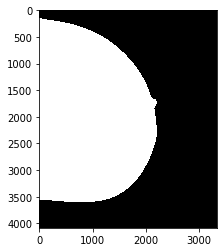

In [8]:
plt.imshow(binarized_mammogram,cmap='gray')

In [9]:
patches_vertexes = patching.patch_corners(binarized_mammogram,patch_size,background_percentage)

0 2202 149 3550


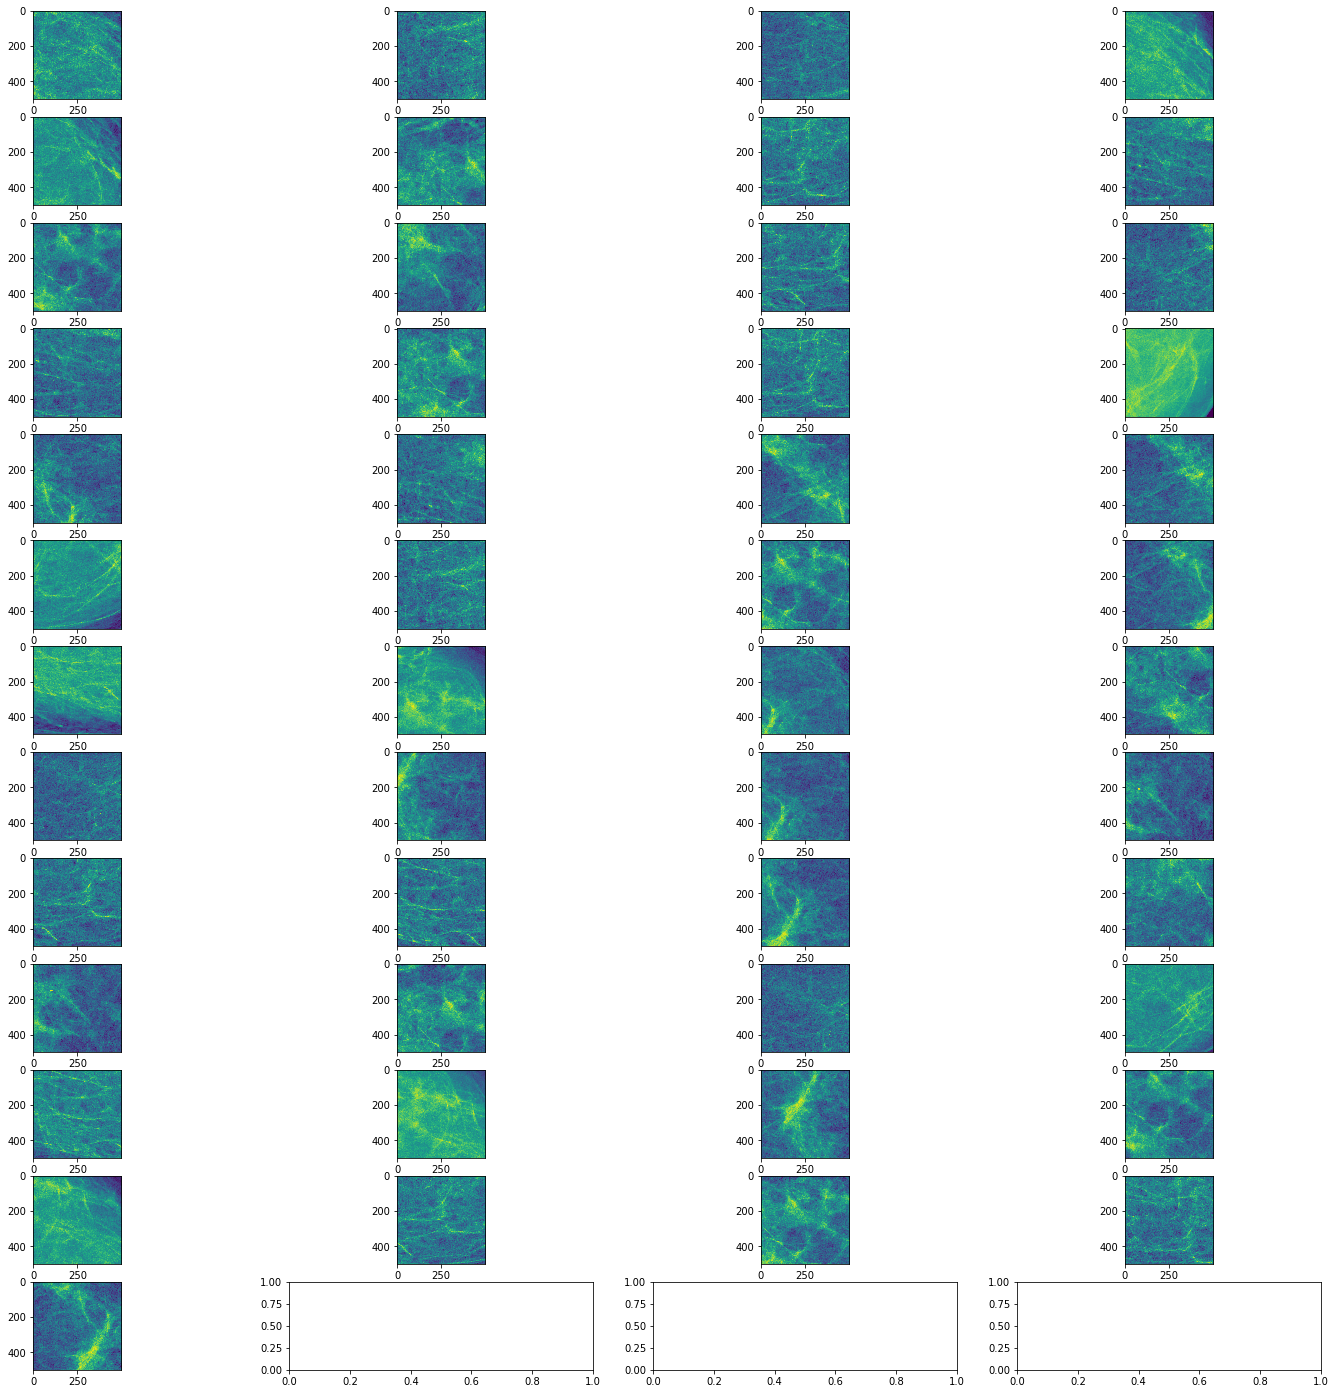

In [16]:
rows = np.ceil(len(patches_vertexes)/4).astype(np.int_)
cols = 4
f,s = plt.subplots(rows,cols,figsize=(25,25))
i=0
for v in patches_vertexes:
    patch = mammogram_array[v[0]:v[1],v[2]:v[3]]
    s[i//4,i%4].imshow(patch)
    i+=1

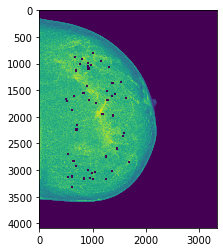

In [17]:
mammogram_with_centers = patching.show_centers(patches_vertexes,mammogram_array)
plt.imshow(mammogram_with_centers)